# install

In [6]:
!pip install yonder

You should consider upgrading via the '/home/chen/PycharmProjects/popcorn/venv/bin/python -m pip install --upgrade pip' command.


# import libraries and data

In [12]:
import yonder
import pandas as pd
import hdbscan
from matplotlib import pyplot as plt

In [13]:
X = pd.read_csv('./datasets/Xobs.csv')
Xsd = pd.read_csv('./datasets/Xsd.csv')
demo = pd.read_csv('./datasets/demo.csv')

# Show the distribution of noisy data

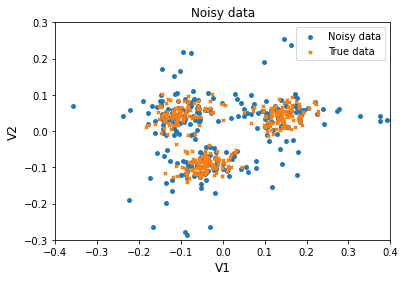

In [14]:
plt.scatter('V1', 'V2', s=15, label='Noisy data', data=X)
plt.scatter('x01', 'x02', s=10, marker='x', label='True data', data=demo)
plt.title('Noisy data')
plt.xlabel('V1', fontsize=12)
plt.ylabel('V2', fontsize=12)
plt.xlim((-0.4, 0.4))
plt.ylim((-0.3, 0.3))
plt.legend()
plt.show()

# Run the `YONDER` and normalize the result

In [15]:
U, S, V = yonder(X, Xsd, 2)
result = U @ S @ V.T

TypeError: 'module' object is not callable

In [ ]:
result = pd.DataFrame(result)
column = []
for i in range(1, 21):
    column.append("V" + str(i))
result.columns = column

# Show the distribution of denoised data

In [ ]:
plt.scatter('V1', 'V2', s=20, cmap='plasma', label='Denoised data', data=result)
plt.scatter('x01', 'x02', s=5, marker='x', label='True data', data=demo)
plt.title('Denoised data')
plt.xlabel('V1', fontsize=12)
plt.ylabel('V2', fontsize=12)
plt.xlim((-0.4, 0.4))
plt.ylim((-0.3, 0.3))
plt.legend()
plt.show()

# Run the HDBScan on both noisy and denoised data

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X[['V1', 'V2']])
X['label'] = clusterer.labels_
X['proab'] = clusterer.probabilities_
X.loc[X['proab'] < 0.5, 'label'] = -1

In [ ]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer2.fit(result[['V1', 'V2']])
result['label'] = clusterer2.labels_
result['proab'] = clusterer2.probabilities_
result.loc[result['proab'] < 0.5, 'label'] = -1

# Show the results

In [ ]:
plt.figure(figsize=(12, 10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
ax1.scatter('x01', 'x02', c='class', s=10, cmap='plasma', data=demo)
plt.title('Classification on original data')
plt.xlabel('V1', fontsize=12)
plt.ylabel('V2', fontsize=12)
plt.xlim((-0.4, 0.4))
plt.ylim((-0.3, 0.3))


ax2 = plt.subplot(222)
ax2.scatter('V1', 'V2', c='label', s=10, cmap='plasma', data=X)
plt.title('Classification on noisy data')
plt.xlabel('V1', fontsize=12)
plt.ylabel('V2', fontsize=12)
plt.xlim((-0.4, 0.4))
plt.ylim((-0.3, 0.3))

ax3 = plt.subplot(223)
ax3.scatter('V1', 'V2', c=result['label'], s=10, cmap='plasma', data=result)
plt.title('Classification on denoised data')
plt.xlabel('V1', fontsize=12)
plt.ylabel('V2', fontsize=12)
plt.xlim((-0.4, 0.4))
plt.ylim((-0.3, 0.3))
plt.tight_layout()
plt.show()